In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
P2 = !awk '{print $2}' ../Data/resultsTimeExperim_2P.txt | tail -8
P3 = !awk '{print $2}' ../Data/resultsTimeExperim_3P.txt | tail -8
P4 = !awk '{print $2}' ../Data/resultsTimeExperim_4P.txt | tail -8
NDS= !awk '{print $7}' ../Data/resultsTimeExperim_4P.txt | tail -8

l = [P2,P3,P4,NDS]
for i in range(len(l)):
    l[i] = list(map(float,l[i]))
    
df = pd.DataFrame(l).T
df.columns = ['P2','P3','P4','N']
df

,P2,P3,P4,N
0,0.961,0.842,1.050,100.0
1,18.047,12.982,17.619,500.0
2,79.623,54.388,82.512,1000.0
3,430.437,441.298,451.403,2000.0
4,703.123,735.436,763.898,2500.0
5,1151.918,775.773,1207.796,3000.0
6,1601.879,1113.364,1699.302,3500.0
7,2438.683,2467.305,2482.801,4000.0


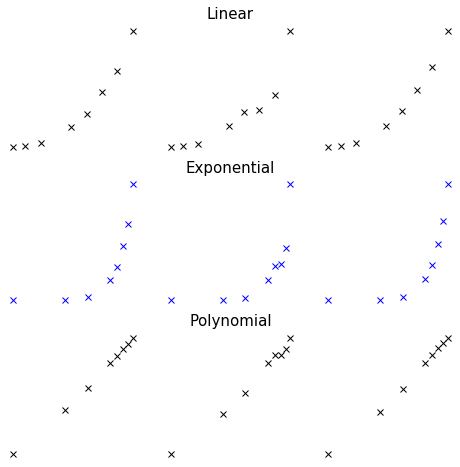

In [3]:
fig,ax = plt.subplots(3,3,figsize=(8,8))

for i in range(3):
    for j in range(3):
        if j == 0:
            ax[j,i].plot(df['N'],df[f'P{i+2}'],'kx')
        elif j==1:
            ax[j,i].plot(np.log(df['N']),df[f'P{i+2}'],'bx')
        else:
            ax[j,i].plot(np.log(df['N']),np.log(df[f'P{i+2}']),'kx')
        ax[j,i].axis('off')
            
ax[0,1].set_title("Linear",fontsize=15)
ax[1,1].set_title("Exponential",fontsize=15)
ax[2,1].set_title("Polynomial",fontsize=15)


plt.show()

### The relationship is polynomial since $log(y) = \alpha log(x)$. Let's fit and extrapolate to full dataset

In [4]:
import statsmodels.formula.api as smf

rP2 = smf.ols('np.log(P2) ~ np.log(N)',df).fit()
rP2.summary()

/home/andres/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(P2)   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     1224.
Date:                Tue, 27 Oct 2020   Prob (F-statistic):           3.63e-08
Time:                        11:32:07   Log-Likelihood:                 2.5377
No. Observations:                   8   AIC:                            -1.075
Df Residuals:                       6   BIC:                           -0.9165
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.1229      0.445    -22.725      0.000     -11.213      -9.033
np.log(N)      2.1360      0.061     34.993      0.000       1.987       2.285
==============================================================================
Omnibus:                        0.565   Durbin-Watson:                   1.317
Prob(Omnibus):                  0.754   Jarque-Bera (JB):                0.507
Skew:                          -0.216   Prob(JB):                        0.776
Kurtosis:                       1.845   Cond. No.                         46.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
rP3 = smf.ols('np.log(P3) ~ np.log(N)',df).fit()
rP3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(P3)   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     433.8
Date:                Tue, 27 Oct 2020   Prob (F-statistic):           7.97e-07
Time:                        11:32:07   Log-Likelihood:                -1.6679
No. Observations:                   8   AIC:                             7.336
Df Residuals:                       6   BIC:                             7.495
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.4194      0.754    -13.827      0.000     -12.263      -8.576
np.log(N)      2.1508      0.103     20.829      0.000       1.898       2.403
==============================================================================
Omnibus:                        1.590   Durbin-Watson:                   1.785
Prob(Omnibus):                  0.452   Jarque-Bera (JB):                0.712
Skew:                          -0.167   Prob(JB):                        0.700
Kurtosis:                       1.577   Cond. No.                         46.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
rP4 = smf.ols('np.log(P4) ~ np.log(N)',df).fit()
rP4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(P4)   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     985.7
Date:                Tue, 27 Oct 2020   Prob (F-statistic):           6.94e-08
Time:                        11:32:07   Log-Likelihood:                 1.6809
No. Observations:                   8   AIC:                            0.6381
Df Residuals:                       6   BIC:                            0.7970
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.0579      0.496    -20.286      0.000     -11.271      -8.845
np.log(N)      2.1331      0.068     31.397      0.000       1.967       2.299
==============================================================================
Omnibus:                        0.534   Durbin-Watson:                   1.447
Prob(Omnibus):                  0.766   Jarque-Bera (JB):                0.514
Skew:                          -0.404   Prob(JB):                        0.773
Kurtosis:                       2.057   Cond. No.                         46.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### It seems like no matter the number of processors, the process scales about as $t = N^2$, and there's a very good correlation. Now let's predict how much it will take for full DS (~11000 examples).

In [7]:
df.loc[8,'N'] = 11356

In [8]:
df['P2 pred'] = np.exp(rP2.predict(df['N']))/3600
df['P3 pred'] = np.exp(rP3.predict(df['N']))/3600
df['P4 pred'] = np.exp(rP4.predict(df['N']))/3600

df

,P2,P3,P4,N,P2 pred,P3 pred,P4 pred
0,0.961,0.842,1.050,100.0,0.000209,0.000166,0.000220
1,18.047,12.982,17.619,500.0,0.006491,0.005290,0.006805
2,79.623,54.388,82.512,1000.0,0.028532,0.023491,0.029852
3,430.437,441.298,451.403,2000.0,0.125408,0.104316,0.130949
4,703.123,735.436,763.898,2500.0,0.201988,0.168571,0.210776
5,1151.918,775.773,1207.796,3000.0,0.298163,0.249507,0.310974
6,1601.879,1113.364,1699.302,3500.0,0.414430,0.347591,0.432046
7,2438.683,2467.305,2482.801,4000.0,0.551216,0.463229,0.574425
8,NaN,NaN,NaN,11356.0,5.120062,4.369641,5.319700


## In any case you should expect about (more than) 18000-19000 s, about 5:16 (h:min). Looks like 3 processors is the best number of processors, providing and advantage of about 45 min (4:30).